## GemPy Models - Some Examples

In [1]:
import sys, os
sys.path.append("../../..")

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
#%matplotlib inline

# Aux imports
import numpy as np
import pandas as pn
import matplotlib
import theano

../../../gempy/plotting/visualization.py:36: UserWarning: Steno 3D package is not installed. No 3D online visualization available.
  warnings.warn('Steno 3D package is not installed. No 3D online visualization available.')
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
../../../gempy/posterior_analysis.py:28: UserWarning: pymc (v3) package is not installed. No support for stochastic simulation posterior analysis.
  warnings.warn("pymc (v3) package is not installed. No support for stochastic simulation posterior analysis.")


### Choose a model and load the corresponding data set in the line below

Model 1: Discordant layering

Model 2: Anticlinal layering

Model 3: Parallel steep dipping layers

Model 5: Normal faulting

Model 6: Synclinal layering

Model 7: Graben structure with two faults

Model 8: Similar to Model 5

Model 9: Parallel flat dipping layers

In [2]:
def create_example(name_model, save_pickle=True, plot_section=True):
    """
    Create an inter_data from one of the examples data_set
    
    Attr:
        name_model (str): name of the model that you want to generate. It has to be in ['Model 1' ,'Model 2', 'Model 3', 'Model 4','Model 5' 'Model 6','Model 7',
                          'Model 8', 'Model 9']
        save_pickle (bool, str): Save to a pickle the interp_data object. You can pass the path as a string otherwse
                                the default name will be given
        plot_section (bool)
    
    """
    name_list = np.array(['Model 1' ,'Model 2', 'Model 3', 'Model 4','Model 5', 'Model 6','Model 7',
                          'Model 8', 'Model 9'])
    assert name_model in name_list, 'Name model must be in the following list: ' + str(name_list) 
    # Extract number of the model
    n_model = name_model[-1]
    
    # Load right gempy geodata
    geo_data = gp.InputData([0,2000,0,2000,0,1600], [50,50,50],
                  path_o = os.path.abspath("./input_data/foliations"+n_model+".csv"),
                  path_i = os.path.abspath("./input_data/interfaces"+n_model+".csv"))
                    
    # Set the right sequential pile
    subset_list_1 = np.array(['Model 1'])
    subset_list_2 = np.array(['Model 5', 'Model 8'])
    subset_list_3 = np.array(['Model 2', 'Model 3', 'Model 9', 'Model 6'])
    subset_list_4 = np.array(['Model 7'])
    ### Model 1 - Discordant layering ###
    if name_model in subset_list_1:
        gp.set_series(geo_data, {"Strat_Series_1":('Sandstone','Siltstone','Shale'),
                                 "Strat_Series_2":('Sandstone2','Siltstone2','Shale2')},
                    order_series = ['Strat_Series_1', 'Strat_Series_2'],
                    order_formations=['Sandstone','Siltstone','Shale','Sandstone2','Siltstone2','Shale2'])
    ### Model 5 - One normal Fault ###
    ### Model 8 - ###
    elif name_model in subset_list_2:
        gp.set_series(geo_data, {"Fault_Series":'Main_Fault',
                             "Strat_Series": ('Sandstone','Siltstone','Shale', 'Sandstone_2', 'Schist', 'Gneiss')},
                order_series = ["Fault_Series", 'Strat_Series'],
                order_formations=['Main_Fault','Sandstone','Siltstone','Shale',
                                  'Sandstone_2', 'Schist', 'Gneiss'], verbose=0)
    elif name_model in subset_list_3:
        ### Model 2 - Aufwölbung (durch Salzstock?) ###
        ### Model 3+9 - Parallele NNE Schichtung ohne Verwerfung ###
        ### Model 6 - Mulde ###
        gp.set_series(geo_data, {"Strat_Series":('Sandstone','Siltstone','Shale','Sandstone_2', 'Schist', 'Gneiss')},
                    order_series = ['Strat_Series'],
                    order_formations=['Sandstone','Siltstone','Shale', 'Sandstone_2', 'Schist', 'Gneiss'], verbose=0)
    
    elif name_model in subset_list_4:
        ### Model 7 - Graben ###
        gp.set_series(geo_data, {"Fault_1":'Fault_1',"Fault_2":'Fault_2',
                                 "Strat_Series":('Sandstone','Siltstone','Shale', 'Sandstone_2', 'Schist', 'Gneiss')},
                    order_series = ["Fault_1","Fault_2", 'Strat_Series'],
                    order_formations=['Fault_1','Fault_2','Sandstone','Siltstone','Shale',
                                      'Sandstone_2', 'Schist', 'Gneiss'], verbose=0)
    else:
        print('You would never reach this point. Look for the bug')
        
    # show sequential pile
    gp.get_sequential_pile(geo_data)
    
    # Interpolation and Computation
    interp_data = gp.InterpolatorData(geo_data,
                                      output='geology', compile_theano=True,
                                      theano_optimizer='fast_compile',
                                      verbose=[])
    lith_block, fault_block = gp.compute_model(interp_data, get_potential_at_interfaces=False)
    #ver , sim = gp.get_surfaces(interp_data, lith_block[1], fault_block[1])
    
    if plot_section is True:
        # 2D Plot
        gp.plotting.plot_section(geo_data, lith_block[0], cell_number=25,
                                 direction='y', plot_data=True)
    
    if save_pickle is not False:
        if type(save_pickle) is str:
            gp.data_to_pickle(interp_data, save_pickle)
        else:
            gp.data_to_pickle(interp_data, 'lisa-'+str(n_model))
    
    return interp_data        

In [26]:
def generate_all_models(list_of_models):
    for n in list_of_models:
        create_example(n, save_pickle=True, plot_section=True)

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float32
Number of faults:  1


../../../gempy/interpolator.py:186: UserWarning: Pickling an InterpolatorData object is EXPERIMENTAL and on your own risk. Try to adjust the recursionlimit.
  warnings.warn('Pickling an InterpolatorData object is EXPERIMENTAL and on your own risk. Try to adjust the recursionlimit.')


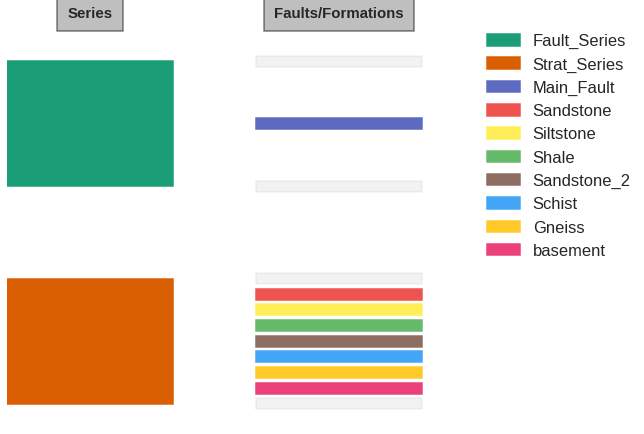

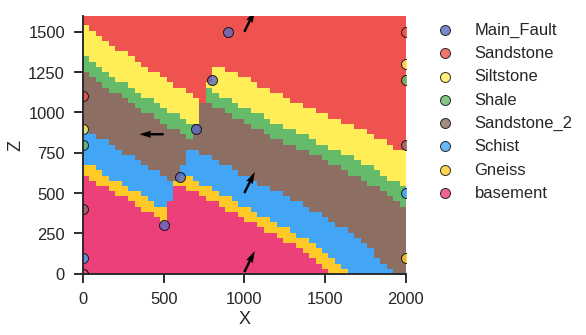

In [36]:
create_example('Model 5')

## Manual Generation

In [2]:
#geo_data = gp.InputData([0,2000,0,2000,0,1600], [100,100,100],
#      path_o = os.pardir+"/input_data/foliations1.csv",
#      path_i = os.pardir+"/input_data/interfaces1.csv")

geo_data = gp.InputData([0,2000,0,2000,0,1600], [20,20,20],
      path_o = os.path.abspath("./input_data/foliations7.csv"),
      path_i = os.path.abspath("./input_data/interfaces7.csv"))
                        

/home/miguel/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


### Run the corresponding line for the chosen model!

In [4]:
### Model 1 - Discordant layering ###
gp.set_series(geo_data, {"Strat_Series_1":('Sandstone','Siltstone','Shale'),
                         "Strat_Series_2":('Sandstone2','Siltstone2','Shale2')},
            order_series = ['Strat_Series_1', 'Strat_Series_2'],
            order_formations=['Sandstone','Siltstone','Shale','Sandstone2','Siltstone2','Shale2'], verbose=0)

In [23]:
### Model 5 - One normal Fault ###
### Model 8 - ###
gp.set_series(geo_data, {"Fault_Series":'Main_Fault',
                         "Strat_Series": ('Sandstone','Siltstone','Shale', 'Sandstone_2', 'Schist', 'Gneiss')},
            order_series = ["Fault_Series", 'Strat_Series'],
            order_formations=['Main_Fault','Sandstone','Siltstone','Shale',
                              'Sandstone_2', 'Schist', 'Gneiss'], verbose=0)

In [87]:
### Model 2 - Aufwölbung (durch Salzstock?) ###
### Model 3+9 - Parallele NNE Schichtung ohne Verwerfung ###
### Model 6 - Mulde ###
gp.set_series(geo_data, {"Strat_Series":('Sandstone','Siltstone','Shale','Sandstone_2', 'Schist', 'Gneiss')},
            order_series = ['Strat_Series'],
            order_formations=['Sandstone','Siltstone','Shale', 'Sandstone_2', 'Schist', 'Gneiss'], verbose=0)

In [3]:
### Model 7 - Graben ###
gp.set_series(geo_data, {"Fault_1":'Fault_1',"Fault_2":'Fault_2',
                         "Strat_Series":('Sandstone','Siltstone','Shale', 'Sandstone_2', 'Schist', 'Gneiss')},
            order_series = ["Fault_1","Fault_2", 'Strat_Series'],
            order_formations=['Fault_1','Fault_2','Sandstone','Siltstone','Shale',
                              'Sandstone_2', 'Schist', 'Gneiss'], verbose=0)

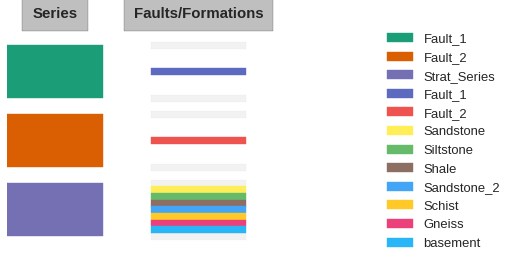

In [4]:
%matplotlib inline
gp.get_sequential_pile(geo_data);

### Interpolation, Modelling and Plotting in one step

In [15]:
# Interpolation and Computation
interp_data = gp.InterpolatorData(geo_data,
                                  output='geology', compile_theano=True,
                                  theano_optimizer='fast_compile',
                                  verbose=['faults_relation', 'n_form_per_serie_0' ])

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_run
Device:  cpu
Precision:  float32
Number of faults:  2


In [38]:
interp_data.interpolator.tg.fault_relation.set_value(np.array([[0, 1, 1],
                                                               [0, 0, 0],
                                                               [0, 0, 0]]))

In [37]:
interp_data.interpolator.tg.fault_relation.get_value()

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [28]:
interp_data.interpolator.tg.len_series_i.get_value()

array([ 0,  1,  2, 14], dtype=int32)

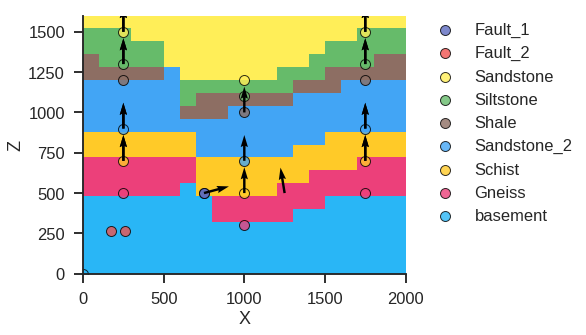

In [39]:
lith_block, fault_block = gp.compute_model(interp_data, get_potential_at_interfaces=False)
#ver , sim = gp.get_surfaces(interp_data, lith_block[1], fault_block[1])

# 2D Plot
%matplotlib inline
gp.plotting.plot_section(geo_data, lith_block[0], cell_number=10,
                         direction='y', plot_data=True)

In [43]:
interp_data.interpolator.tg.n_formation.get_value()

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

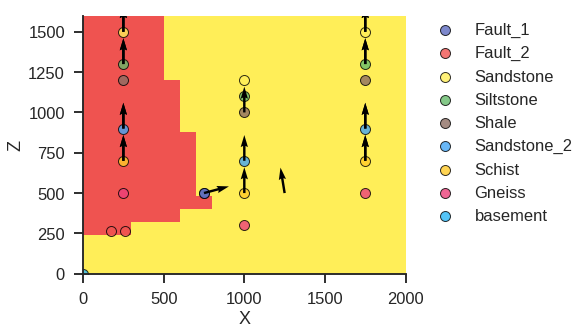

In [41]:
gp.plotting.plot_section(geo_data, fault_block[2], cell_number=10,
                         direction='y', plot_data=True)

In [31]:
#interp_data.update_interpolator(geo_data)
#lith_block, _ = gp.compute_model(interp_data)

In [40]:
# 3D Plot
vtk_plot = gp.plotting.vtkPlot(geo_data)
ver, sim = gp.get_surfaces(interp_data, lith_block[1],fault_block[[1,3]])
vtk_plot.plot_surfaces_3D_real_time(interp_data, ver, sim, size=(1920, 2160))

closing vtk


In [21]:
gp.data_to_pickle(interp_data, 'lisa-7')

../../../gempy/interpolator.py:186: UserWarning: Pickling an InterpolatorData object is EXPERIMENTAL and on your own risk. Try to adjust the recursionlimit.
  warnings.warn('Pickling an InterpolatorData object is EXPERIMENTAL and on your own risk. Try to adjust the recursionlimit.')


In [14]:
i = gp.read_pickle('lisa-1.pickle')

In [16]:

gp.compute_model(i)

/home/miguel/anaconda3/lib/python3.6/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


[array([[ 7.      ,  7.      ,  7.      , ...,  1.      ,  1.      ,
          1.      ],
        [10.71307 , 10.721241, 10.729412, ..., 41.5402  , 41.550865,
         41.561535]], dtype=float32),
 array([], shape=(0, 1000000), dtype=float32)]

In [44]:
interp_data = Out[36]
lith_block, _ = gp.compute_model(interp_data)
ver, sim = gp.get_surfaces(interp_data, lith_block[1],None, original_scale=False)
gp.plot_surfaces_3D(interp_data.geo_data_res, ver, sim)

/home/miguel/anaconda3/lib/python3.6/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
../../../gempy/gempy_front.py:900: FutureWarning: gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead
  "use gempy.plotting module instead", FutureWarning)


closing vtk
